In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_array = cv2.imread(r"C:\Users\Dillusha Jayanindu\Desktop\Emotion Recognition2\Datasets\Training\0\Training_37202220.jpg")

In [3]:
img_array.shape

(48, 48, 3)

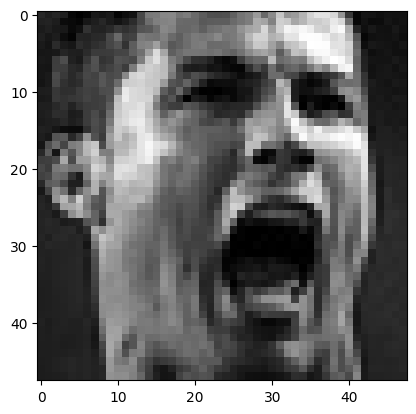

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = r"C:\Users\Dillusha Jayanindu\Desktop\Emotion Recognition2\Datasets\Training"

In [6]:
Classes = ["0","1","2","3","4","5","6"]

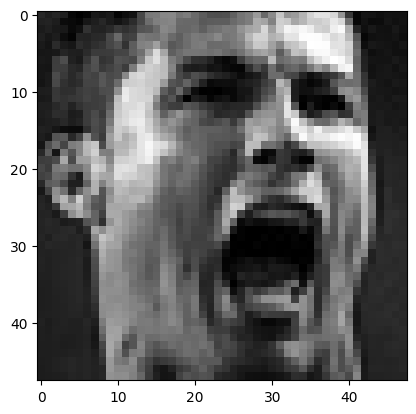

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


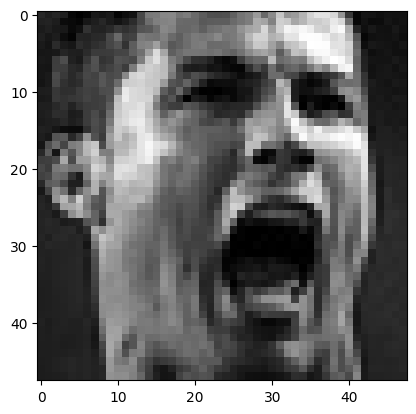

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []

def create_training_data():
    for category in Classes:
        class_num = Classes.index(category)
        path = os.path.join(Datadirectory, category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
if training_Data is not None:
    print(len(training_Data))
else:
    print("Error: training_Data is None. Check the create_training_data function.")

13500


In [13]:
import random
random.shuffle(training_Data)

In [14]:
def inspect_data(data):
    if isinstance(data, list):
        for element in data:
            inspect_data(element)  # Recursively call for nested lists
    else:
        print(type(data))
        try:
            print(data.shape)  # Try printing shape if it has one
        except AttributeError:
            pass  # Ignore if it doesn't have a shape attribute

inspect_data(training_Data)


<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'int'>
<class 'nump

In [15]:
temp = np.array(training_Data, dtype=object)

In [16]:
print(temp)

[[array([[[ 89,  89,  89],
          [ 89,  89,  89],
          [ 89,  89,  89],
          ...,
          [ 85,  85,  85],
          [ 85,  85,  85],
          [ 85,  85,  85]],

         [[ 89,  89,  89],
          [ 89,  89,  89],
          [ 89,  89,  89],
          ...,
          [ 85,  85,  85],
          [ 85,  85,  85],
          [ 85,  85,  85]],

         [[ 89,  89,  89],
          [ 89,  89,  89],
          [ 89,  89,  89],
          ...,
          [ 84,  84,  84],
          [ 85,  85,  85],
          [ 85,  85,  85]],

         ...,

         [[ 36,  36,  36],
          [ 36,  36,  36],
          [ 36,  36,  36],
          ...,
          [128, 128, 128],
          [128, 128, 128],
          [128, 128, 128]],

         [[ 36,  36,  36],
          [ 36,  36,  36],
          [ 36,  36,  36],
          ...,
          [128, 128, 128],
          [128, 128, 128],
          [128, 128, 128]],

         [[ 36,  36,  36],
          [ 36,  36,  36],
          [ 36,  36,  36],
         

In [17]:
X = []
Y = []

for features,label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [18]:
X.shape

(13500, 224, 224, 3)

In [19]:
import sys
print(sys.version)


3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]


In [20]:
X=X/255.0;

In [21]:
type(Y)

list

In [22]:
if len(Y) > 0:
  print(Y[0])
else:
  print("Y list is empty")

3


In [23]:
Y[0]

3

In [24]:
Y = np.array(Y)

In [25]:
Y.shape

(13500,)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = tf.keras.applications.MobileNetV2()

In [28]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [29]:
base_input = model.layers[0].input

In [30]:
base_output = model.layers[-2].output

In [31]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [32]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [33]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [34]:
new_model = keras.Model(inputs=model.input, outputs=final_output)

In [35]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [36]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
history=new_model.fit(X, Y, epochs=15)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1703s 4s/step - accuracy: 0.4092 - loss: 1.5245
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1657s 4s/step - accuracy: 0.5469 - loss: 1.1889
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1662s 4s/step - accuracy: 0.6018 - loss: 1.0674
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1670s 4s/step - accuracy: 0.6356 - loss: 0.9727
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1669s 4s/step - accuracy: 0.6604 - loss: 0.9169
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1662s 4s/step - accuracy: 0.6858 - loss: 0.8466
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1666s 4s/step - accuracy: 0.7105 - loss: 0.7774
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1665s 4s/step - accuracy: 0.7352 - loss: 0.7127
Epoch 9/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1657s 4s/step - accuracy: 0.7603 - loss: 0.6627
Epoch 10/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1682s 4s/step - accuracy: 0.7927 - loss: 0.5878
Epoch 11/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1679s 4s/step - accuracy: 0.8081 - loss: 0.5357
Epoch 12/15
422/422 ━━━━━━━━━━

In [38]:
history2 =new_model.fit(X, Y, epochs=5)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1687s 4s/step - accuracy: 0.8999 - loss: 0.2833
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1676s 4s/step - accuracy: 0.9093 - loss: 0.2628
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1682s 4s/step - accuracy: 0.9157 - loss: 0.2419
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1683s 4s/step - accuracy: 0.9316 - loss: 0.2123
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1675s 4s/step - accuracy: 0.9300 - loss: 0.2075


In [39]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [40]:
new_model.save('Final_model.h5')

In [41]:
new_model.save('Final_model.keras')

In [42]:
new_model = tf.keras.models.load_model('Final_model.h5')

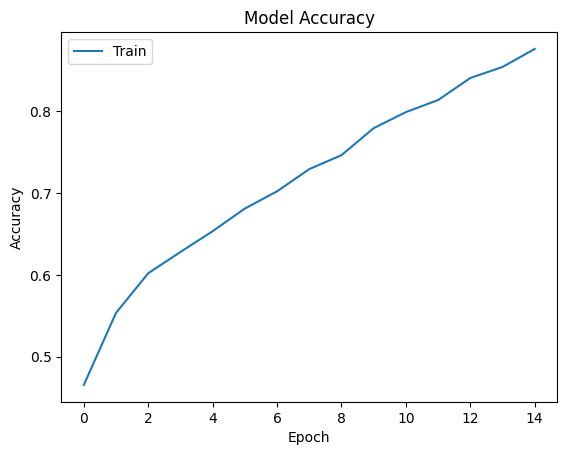

In [43]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


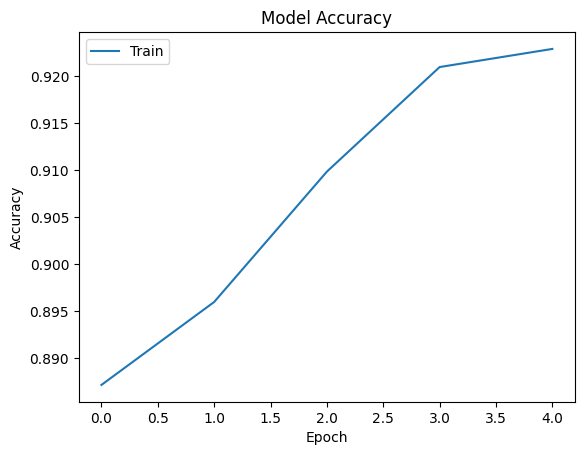

In [44]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


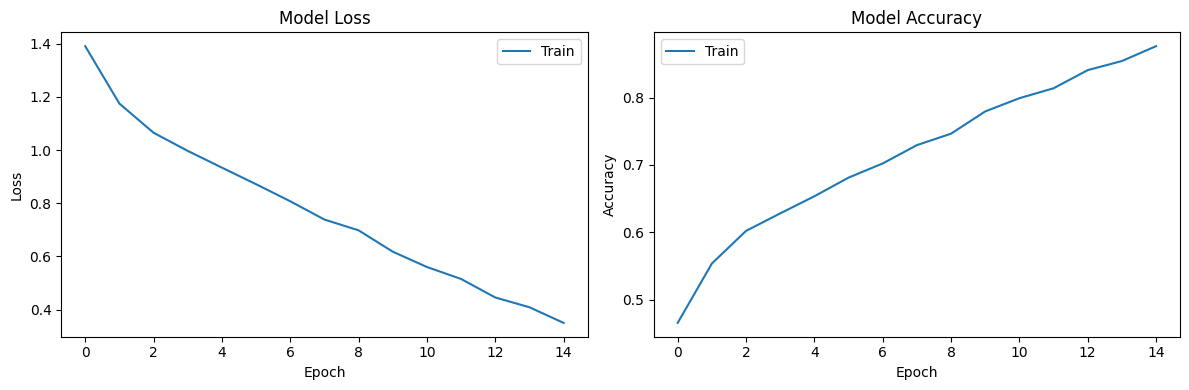

In [45]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()


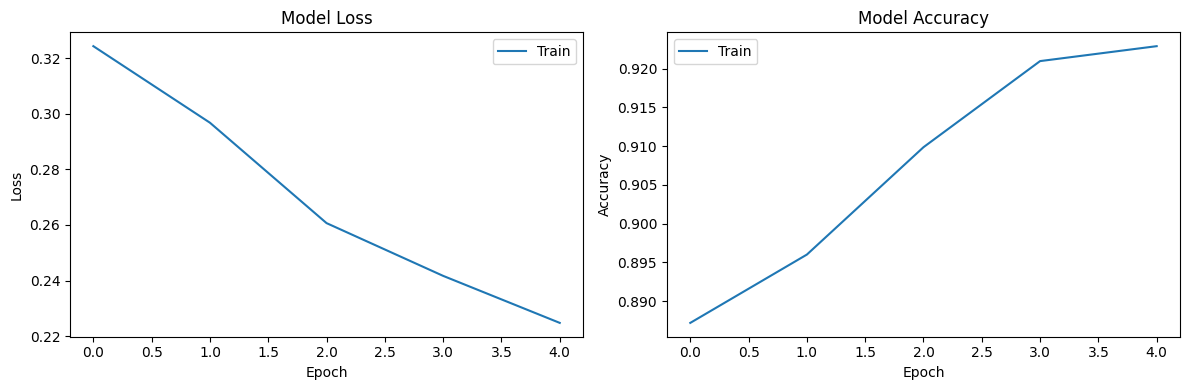

In [46]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()


In [47]:
def predict_image(image_path):
  img = cv2.imread(image_path)  # Read the image
  if img is not None:  # Check if image loaded successfully
    img = cv2.resize(img, (img_size, img_size))  # Resize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values
    predictions = new_model.predict(img)
    predicted_class = np.argmax(predictions[0])
    class_names = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']  # Replace with your class names
    return class_names[predicted_class]
  else:
    return "Error: Image not loaded. Check the file path."

In [48]:
image_path = r"C:\Users\Dillusha Jayanindu\Desktop\Emotion Recognition\Datasets\implementation\happy_boy.jpg"
predicted_class = predict_image(image_path)
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Fear


In [49]:
frame = cv2.imread(image_path)
# Check if the image was loaded successfully
if frame is not None:
    print("Image loaded successfully")
else:
    print("Error: Image not loaded. Check the file path.")

Image loaded successfully


In [50]:
frame.shape

(3264, 5824, 3)

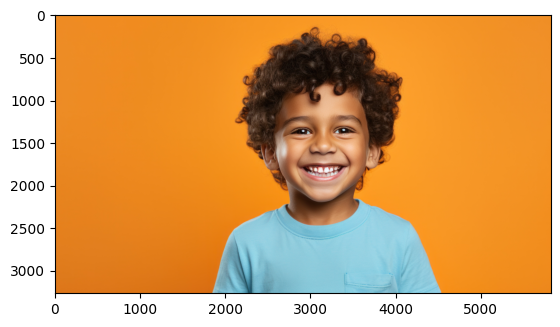

In [51]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [52]:
faceCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [53]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [54]:
gray.shape

(3264, 5824, 3)

In [55]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h, in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex + ew]

Face not detected


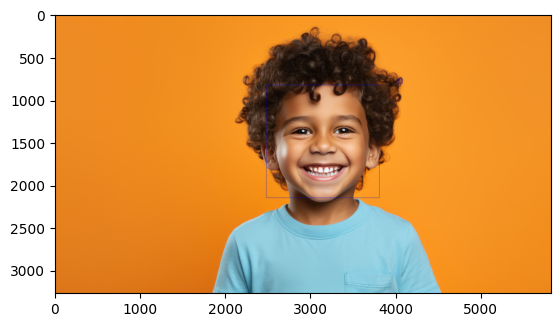

In [56]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

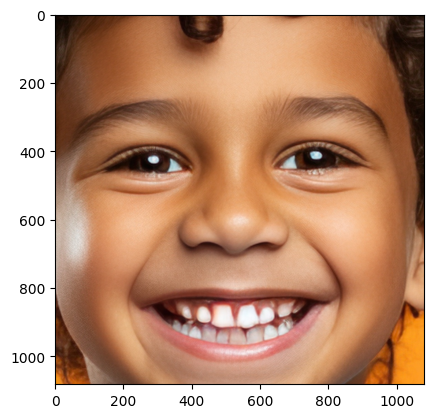

In [57]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [58]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [59]:
predictions =new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [60]:
predictions[0]

array([6.2681842e-03, 1.0499095e-04, 2.3824821e-01, 1.0959497e-01,
       4.4371463e-02, 3.5864259e-03, 5.9782577e-01], dtype=float32)

In [61]:
np.argmax(predictions)

6

In [62]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import logging

# Suppress TensorFlow warnings
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Load pre-trained emotion detection model
new_model = load_model('Final_model.h5')

# Initialize webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Load Haar cascade for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Resize and preprocess the face for the emotion prediction model
        face_roi = cv2.resize(roi_color, (224, 224))
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = face_roi / 255.0

        # Predict emotion
        predictions = new_model.predict(face_roi)
        emotion_index = np.argmax(predictions)
        emotions = ['Happy', 'Sad', 'Angry', 'Fear', 'Neutral']
        status = emotions[emotion_index]

        # Display the results
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2, cv2.LINE_4)
        color = (0, 255, 0) if status == 'Neutral' else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


IndexError: list index out of range

In [ ]:
if ret:  # Assuming 'ret' is returned by cv2.VideoCapture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade_name = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(face_cascade_name)

    cap = cv2.VideoCapture(0)  # Assuming you're using webcam

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.1, 4)

        # Process detected faces (code omitted for brevity)

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        cap.release()
        cv2.destroyAllWindows()
else:
    print("Error: Frame not read from camera.")
    # Handle the case where the frame is empty (e.g., break the loop)


In [3]:
from tensorflow.keras.models import load_model

saved_model = load_model(r'D:\Emotion Recognition V3\Emotion Recognition2\Emotion Recognition2\Datasets\Final_model.h5')

In [4]:
import os
import cv2
import numpy as np
img_size=224
testing_directory = r"D:\Emotion Recognition V3\Emotion Recognition2\Emotion Recognition2\Datasets\Testing"
testing_data = []

for category in os.listdir(testing_directory):
    class_num = int(category) 
    path = os.path.join(testing_directory, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            testing_data.append([new_array, class_num])
        except Exception as e:
            pass

X_test = np.array([item[0] for item in testing_data]).reshape(-1, img_size, img_size, 3)
Y_test = np.array([item[1] for item in testing_data])


In [5]:
test_loss, test_accuracy = saved_model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 156s 685ms/step - accuracy: 0.3962 - loss: 1.9688
Test accuracy: 0.1333


In [6]:
sys. version

NameError: name 'sys' is not defined

In [7]:
import platform

# Get platform information
platform_info = platform.platform()  # Complete platform information
python_version = platform.python_version()  # Python version
system_name = platform.system()  # Operating system name

print("Platform Information:", platform_info)
print("Python Version:", python_version)
print("System Name:", system_name)


Platform Information: Windows-10-10.0.19045-SP0
Python Version: 3.11.9
System Name: Windows
